In [1]:
import sys
sys.path.append('..')
import ids_main
import pandas as pd
import numpy as np
import dask.dataframe as dd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Normalizer
from ids_main.models.BinaryBayesClassifier import BinaryBayesClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
import matplotlib.pyplot as plt

In [2]:
cicids_2017 = dd.read_parquet('../parquet/inter_dataset/cicids_2017.parquet')
cicids_2018 = dd.read_parquet('../parquet/inter_dataset/cicids_2018.parquet')

In [5]:
attack_counts = cicids_2017.Label.value_counts().compute().to_frame().reset_index().rename(columns={'index':'Label','Label':'Counts'})
display(attack_counts)
attack_counts.to_csv('cicids_2017_counts.csv',index=False)

NameError: name 'cicids_2017' is not defined

In [5]:
attack_counts = cicids_2018.Label.value_counts().compute().to_frame().reset_index().rename(columns={'index':'Label','Label':'Counts'})
display(attack_counts)
attack_counts.to_csv('cicids_2018_counts.csv',index=False)

,Label,Counts
0,Benign,13390249
1,DDOS attack-HOIC,686012
2,DDoS attacks-LOIC-HTTP,576191
3,DoS attacks-Hulk,461912
4,Bot,286191
5,FTP-BruteForce,193354
6,SSH-Bruteforce,187589
7,Infilteration,160639
8,DoS attacks-SlowHTTPTest,139890
9,DoS attacks-GoldenEye,41508


In [6]:
scaler = MinMaxScaler()
x = cicids_2017.drop(columns='Label').values.compute()
y = cicids_2017.apply(lambda r:0 if r.Label.lower()=='benign' else 1,axis=1).compute()

/Users/fakhry/Projects/ids_project/ids/.venv/lib/python3.9/site-packages/dask/dataframe/core.py:5690: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=(None, 'int64'))

  warnings.warn(meta_warning(meta))


In [8]:
y = y.values

In [13]:
np.unique(y,return_counts=True)

(array([0, 1]), array([2271320,  556556]))

In [17]:
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.8)

In [19]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
x_ts = np.sqrt(np.sum(np.square(X_test),axis=1))
x_tr = np.sqrt(np.sum(np.square(X_train),axis=1))

In [43]:
bbc = BinaryBayesClassifier(dist_bins=2000)

In [45]:
bbc.fit(x_tr,y_train)

In [46]:
y_pred = bbc.predict(x_ts)

In [51]:
f1_score(y_pred ,y_test)

0.6059634279475983

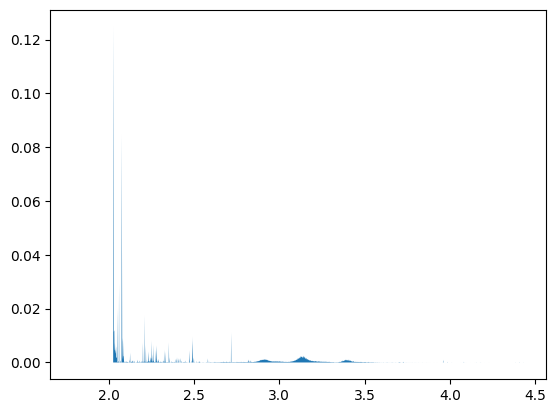

In [48]:
plt.fill_between(bbc.dist_true.samples_range,bbc.dist_true.dist_prob)

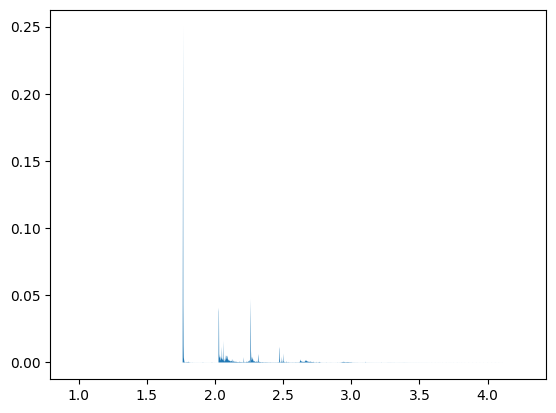

In [49]:
plt.fill_between(bbc.dist_false.samples_range,bbc.dist_false.dist_prob)

In [8]:
cicids_2017_mm = cicids_2017.copy().compute()

In [5]:
mms = MinMaxScaler()

In [9]:
cicids_2017_mm.loc[:,[c for c in cicids_2017.columns if c!='Label']]=mms.fit_transform(cicids_2017_mm[[c for c in cicids_2017.columns if c!='Label']].values)

In [11]:
cicids_2017_mm.describe()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,...,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06
mean,1.233389e-01,3.808267e-05,3.563951e-05,4.262420e-05,2.468373e-05,8.372458e-03,8.055610e-03,9.806039e-03,9.680328e-03,4.463545e-02,...,2.539612e-05,9.999946e-01,7.421273e-04,5.549302e-04,1.393980e-03,5.304993e-04,6.937056e-02,6.558580e-03,7.253807e-02,6.606717e-02
std,2.805625e-01,3.413085e-03,3.418357e-03,7.750883e-04,3.454458e-03,2.890887e-02,2.595928e-02,3.133779e-02,3.948037e-02,9.970081e-02,...,2.981631e-03,2.021975e-03,5.899304e-03,5.304295e-03,9.330302e-03,5.248925e-03,1.970047e-01,5.988673e-02,2.031472e-01,1.947825e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.400000e-06,4.550460e-06,3.425573e-06,9.302326e-07,3.051325e-09,2.417405e-04,0.000000e+00,1.009955e-03,0.000000e+00,1.024066e-04,...,0.000000e+00,9.999998e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.612583e-04,4.550460e-06,6.851145e-06,4.806202e-06,1.876565e-07,1.490733e-03,8.602151e-04,5.723080e-03,0.000000e+00,4.045059e-03,...,4.682591e-06,9.999998e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.699484e-02,1.820184e-05,1.370229e-05,1.457364e-05,7.384206e-07,3.263497e-03,1.548387e-02,8.416294e-03,3.671686e-03,1.443932e-02,...,9.365181e-06,9.999998e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [12]:
cicids_2017.describe().compute()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,...,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06
mean,1.480065e+07,9.368972e+00,1.040396e+01,5.498522e+02,1.617903e+04,2.078044e+02,1.872929e+01,5.825628e+01,6.897811e+01,8.717304e+02,...,5.423519e+00,-2.744494e+03,8.163400e+04,4.117582e+04,1.533378e+05,5.835492e+04,8.324468e+06,5.043548e+05,8.704568e+06,7.928061e+06
std,3.366750e+07,7.500527e+02,9.978937e+02,9.998639e+03,2.264235e+06,7.175183e+02,6.035533e+01,1.861733e+02,2.813212e+02,1.947157e+03,...,6.367482e+02,1.085539e+06,6.489234e+05,3.935787e+05,1.026333e+06,5.773818e+05,2.364057e+07,4.605289e+06,2.437766e+07,2.337390e+07
min,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.550000e+02,2.000000e+00,1.000000e+00,1.200000e+01,2.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,2.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.133800e+04,2.000000e+00,2.000000e+00,6.200000e+01,1.230000e+02,3.700000e+01,2.000000e+00,3.400000e+01,0.000000e+00,7.900000e+01,...,1.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.239368e+06,5.000000e+00,4.000000e+00,1.880000e+02,4.840000e+02,8.100000e+01,3.600000e+01,5.000000e+01,2.616295e+01,2.820000e+02,...,2.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,1.953000e+04,...,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


In [13]:
cicids_2018.describe().compute()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,1.613718e+07,1.613718e+07,1.613718e+07,1.613718e+07,1.613718e+07,1.613718e+07,1.613718e+07,1.613718e+07,1.613718e+07,1.613718e+07,...,1.613718e+07,1.613718e+07,1.613718e+07,1.613718e+07,1.613718e+07,1.613718e+07,1.613718e+07,1.613718e+07,1.613718e+07,1.613718e+07
mean,1.188391e+07,2.366101e+01,6.350066e+00,9.787339e+02,4.759005e+03,2.018772e+02,1.113822e+01,5.057154e+01,7.121097e+01,3.522270e+02,...,2.001328e+01,1.798076e+01,1.739035e+05,8.695392e+04,2.639491e+05,1.161508e+05,5.046729e+06,2.883501e+05,5.460356e+06,4.713436e+06
std,4.954751e+08,1.525643e+03,1.645109e+02,6.235320e+04,2.351602e+05,3.040568e+02,2.428501e+01,6.058433e+01,1.166803e+02,4.981633e+02,...,1.524419e+03,7.715060e+00,2.513315e+06,1.519048e+06,3.329002e+06,2.120390e+06,2.640976e+08,1.696900e+08,6.272230e+08,6.383958e+07
min,-9.190110e+11,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.140000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.269600e+04,2.000000e+00,1.000000e+00,4.300000e+01,1.020000e+02,4.100000e+01,0.000000e+00,3.600000e+01,0.000000e+00,9.600000e+01,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.048724e+06,5.000000e+00,4.000000e+00,4.880000e+02,5.820000e+02,3.120000e+02,3.000000e+01,6.800000e+01,1.075676e+02,4.880000e+02,...,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.200000e+08,3.096290e+05,1.231180e+05,1.443918e+08,1.563604e+08,6.444000e+04,1.460000e+03,1.652931e+04,1.840158e+04,6.516000e+04,...,3.096280e+05,5.600000e+01,1.140000e+08,7.523241e+07,1.140000e+08,1.140000e+08,3.955714e+11,2.622479e+11,9.797810e+11,2.399340e+11
